# Análise de Dados da Fatal Model com PySpark
## Sophia Katze de Paula, Jun/2025

Este notebook apresenta a análise dos dados **users** e **user_transactions**, executando queries SQL via Pandas e PandaSQL, realizando uma simulação Monte Carlo de descontos.

## 1.1 Imports e Setup

Import das bibliotecas necessárias, bem como de ajuste nas tabelas

In [1]:
# 1. Carregamento Completo e Otimizado com Pandas
# Autora: Sophia Katze de Paula – 2025-06-11

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandasql import sqldf
import os
import sys
import py7zr  

# Configurações gerais
pd.set_option('display.max_columns', None)
sns.set_theme(style='whitegrid')

#Unzip do Dataset
py7zr.SevenZipFile(r'data/datasets.7z', mode='r').extractall(path=r'data/')

# Carregando os dados 
df_transactions_raw = pd.read_csv(r'data/user_transaction_items_retificado2.csv')
df_users_raw = pd.read_csv(r'data/users.csv')

# Remover espaços dos nomes das colunas e converter para minúsculas
df_transactions_raw.columns = df_transactions_raw.columns.str.replace(' ', '_').str.lower()
df_users_raw.columns = df_users_raw.columns.str.replace(' ', '_').str.lower()


# Exibir os novos nomes das colunas
print("Colunas de df_items:")
print(df_transactions_raw.columns.tolist())

print("\nColunas de df_users:")
print(df_users_raw.columns.tolist())

# Após carregar os DataFrames df_transaction e df_users:
env_init = {
    'transactions_raw': df_transactions_raw,
    'users_raw': df_users_raw
}


Colunas de df_items:
['created_at', 'approved_at', 'uf', 'payment_method', 'period', 'quantity', 'transaction_total_items', 'plan', 'initial_purchase', 'full_value', 'transaction_paid_value', 'paid_value', 'transaction_id', 'user_id', 'userable_id', 'discount_percent']

Colunas de df_users:
['ad_id', 'user_id', 'data_criado', 'data_primeira_mdc_aprovada', 'status_descricao', 'quantidade_planos_ativos', 'seguidores', 'cidade', 'uf', 'data_deletado', 'ultimo_visto', 'data_primeira_compra', 'data_ultima_compra', 'quantidade_de_compras', 'total_investido', 'posts', 'posts_ativos', 'videos_ativos', 'data_desabilitado', 'data_desabilitado_ate', 'status_documentos']


In [2]:
def exec_sql(sql_filename: str, env: dict) -> pd.DataFrame:
    """
    Lê um arquivo .sql da pasta ../sql e executa a query via pandasql.

    Args:
        sql_filename (str): Nome do arquivo .sql (ex: '01_user_status.sql').
        env (dict): Dicionário de DataFrames disponíveis para a query
                    (ex: {'df_transacoes': df_transacoes, 'df_usuarios': df_usuarios}).

    Returns:
        pd.DataFrame: Resultado da consulta.
    """
    # Monta o caminho completo relativo ao notebook em notebooks/
    path = os.path.join('sql', sql_filename)
    with open(path, 'r', encoding='utf-8') as f:
        query = f.read()
    # Executa a query no contexto dos DataFrames fornecidos
    return sqldf(query, env)

# Exemplo de uso:
# env = {'df_transacoes': df_transacoes, 'df_usuarios': df_usuarios}
# df_status = exec_sql('01_user_status.sql', env)

## 1.2 Limpeza dos dados

Tratamento de Null's e Duplicados

In [3]:
print("Total rows users: ", df_users_raw.shape[0])
print("Total rows transactions: ", df_transactions_raw.shape[0])

Total rows users:  814354
Total rows transactions:  1048575


In [4]:
# Print nulls and duplicates for df_users_raw
print("Nulls in df_users_raw:")
print(df_users_raw.isnull().sum())
print("\nDuplicates in df_users_raw:")
print(df_users_raw.duplicated().sum())


Nulls in df_users_raw:
ad_id                              0
user_id                            0
data_criado                        0
data_primeira_mdc_aprovada    672943
status_descricao                   0
quantidade_planos_ativos           0
seguidores                         0
cidade                        206314
uf                            206314
data_deletado                 585594
ultimo_visto                  138828
data_primeira_compra          739959
data_ultima_compra            739959
quantidade_de_compras              0
total_investido                    0
posts                              0
posts_ativos                       0
videos_ativos                      0
data_desabilitado             798380
data_desabilitado_ate         798383
status_documentos             466562
dtype: int64

Duplicates in df_users_raw:
1


In [5]:
# Print nulls and duplicates for df_transactions_raw  
print("Nulls in df_transactions_raw:")
print(df_transactions_raw.isnull().sum())
print("\nDuplicates in df_transactions_raw:")
print(df_transactions_raw.duplicated().sum())

Nulls in df_transactions_raw:
created_at                      0
approved_at                 14106
uf                              0
payment_method                  0
period                     147630
quantity                        0
transaction_total_items     49362
plan                            0
initial_purchase            14106
full_value                      6
transaction_paid_value      49362
paid_value                      6
transaction_id              11595
user_id                         0
userable_id                     0
discount_percent               13
dtype: int64

Duplicates in df_transactions_raw:
488


In [6]:
#Executamos os SQL de limpeza
df_transactions = exec_sql('clean_user_transactions.sql', env_init)
df_users = exec_sql('clean_users.sql', env_init)

# Após carregar os DataFrames df_transaction e df_users:
env = {
    'user_transactions': df_transactions,
    'users': df_users
}

In [7]:
# Print nulls and duplicates for df_users
print("Nulls in df_users_raw:")
print(df_users_raw.isnull().sum())
print("\nDuplicates in df_users_raw:")
print(df_users_raw.duplicated().sum())

Nulls in df_users_raw:
ad_id                              0
user_id                            0
data_criado                        0
data_primeira_mdc_aprovada    672943
status_descricao                   0
quantidade_planos_ativos           0
seguidores                         0
cidade                        206314
uf                            206314
data_deletado                 585594
ultimo_visto                  138828
data_primeira_compra          739959
data_ultima_compra            739959
quantidade_de_compras              0
total_investido                    0
posts                              0
posts_ativos                       0
videos_ativos                      0
data_desabilitado             798380
data_desabilitado_ate         798383
status_documentos             466562
dtype: int64

Duplicates in df_users_raw:
1


In [8]:
# Print nulls and duplicates for df_transactions
print("Nulls in df_transactions:")
print(df_transactions.isnull().sum())
print("\nDuplicates in df_transactions:")
print(df_transactions.duplicated().sum())

Nulls in df_transactions:
created_at                    0
approved_at                2495
uf                            0
payment_method                0
period                        0
quantity                      0
plan                          0
initial_purchase              0
full_value                    0
transaction_paid_value    37808
paid_value                    0
transaction_id                0
user_id                       0
userable_id                   0
discount_percent              0
is_approved                   0
dtype: int64

Duplicates in df_transactions:
0


Considerando que os NULL's representam grande parte do dataset, e analisando as queries que vamos fazer, não vamos usar as colunas com NULLs, porém um ponto de atenção no futuro é fazer um plano de ação para fazer o registro desses dados

## 2. Desafio 1.1: Taxa de Usuários por Status

Qual a proporção de usuários ativos, onboarding, desabilitados e deletados?

In [9]:
# Executa arquivo sql/01_user_status.sql
df_status = exec_sql('01_user_status.sql', env)
df_status

,status_descricao,qtd_status,pct_status
0,Onboarding,511169,62.77
1,Deletado,222430,27.31
2,Ativo,44671,5.49
3,MDC Expirada,10212,1.25
4,Desabilitado,7802,0.96
5,Delay,6484,0.80
6,Banido,6330,0.78
7,Deprecado,2969,0.36
8,MDC Reprovada,951,0.12
9,Erro - Status 20 e deleted_at vazio,605,0.07


**Insight:** A saúde da base é medida por X% ativos e Y% banidos, direcionando estratégias de retenção e reengajamento.

## 3. Desafio 1.2: Padrão de Compras e Sazonalidade

Como variam as compras e receita ao longo do tempo?## 3. Desafio 1.2: Padrão de Compras e Sazonalidade

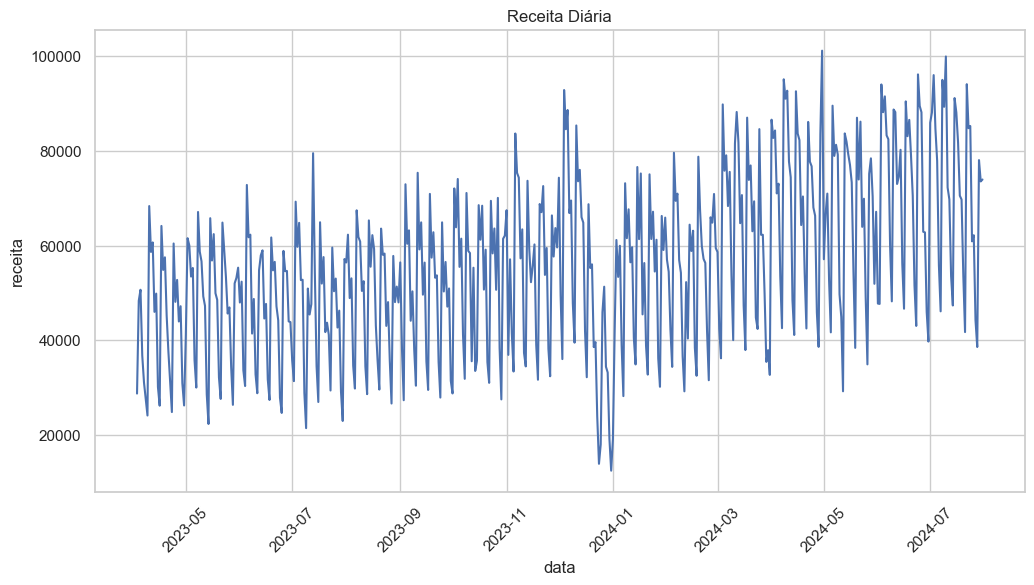

In [10]:
# Executa arquivo sql/02_daily_sales.sql
df_daily = exec_sql('02_daily_sales.sql', env)

# Converte a coluna para datetime se necessário
df_daily['data'] = pd.to_datetime(df_daily['data'])

#Plotando
plt.figure(figsize=(12,6))
sns.lineplot(data=df_daily, x='data', y='receita')
plt.xticks(rotation=45)
plt.title('Receita Diária')
plt.show()

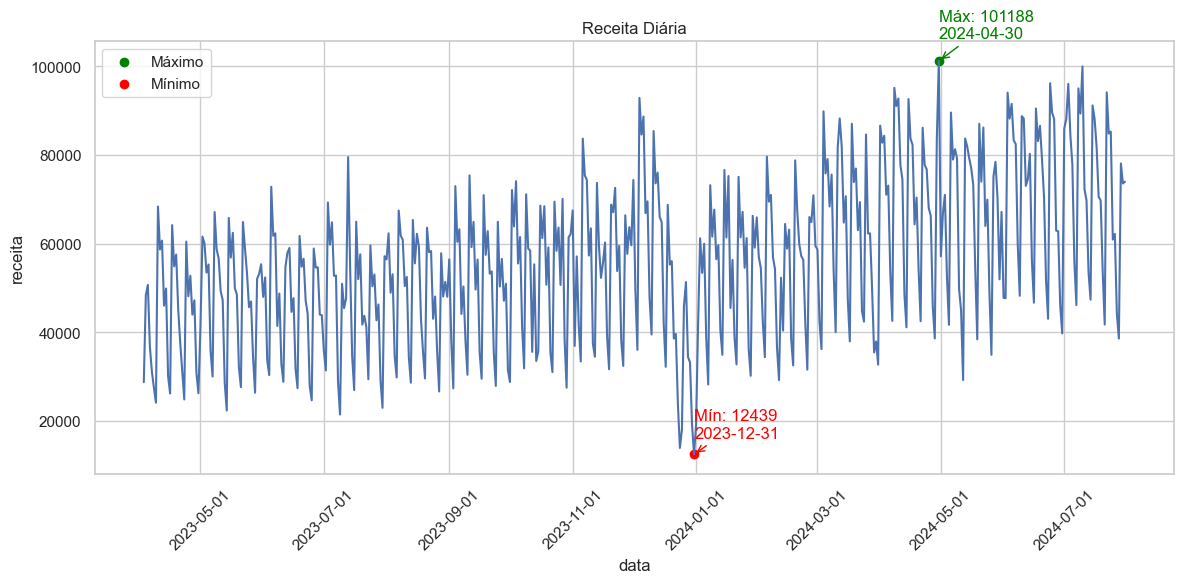

In [11]:
import matplotlib.dates as mdates
#O obejtivo é encontrar e indicar no gráfico max e min e respectivas datas

# Encontra o valor máximo e mínimo
max_row = df_daily.loc[df_daily['receita'].idxmax()]
min_row = df_daily.loc[df_daily['receita'].idxmin()]

# Plot principal
plt.figure(figsize=(12,6))
sns.lineplot(data=df_daily, x='data', y='receita')

# Destaques
plt.scatter([max_row['data']], [max_row['receita']], color='green', label='Máximo')
plt.scatter([min_row['data']], [min_row['receita']], color='red', label='Mínimo')

# Anotações
plt.annotate(f"Máx: {max_row['receita']:.0f}\n{max_row['data'].date()}",
             xy=(max_row['data'], max_row['receita']),
             xytext=(max_row['data'], max_row['receita'] * 1.05),
             arrowprops=dict(arrowstyle="->", color='green'),
             color='green')

plt.annotate(f"Mín: {min_row['receita']:.0f}\n{min_row['data'].date()}",
             xy=(min_row['data'], min_row['receita']),
             xytext=(min_row['data'], min_row['receita'] * 1.3),
             arrowprops=dict(arrowstyle="->", color='red'),
             color='red')

# Eixo x formatado
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.title('Receita Diária')
plt.legend()
plt.tight_layout()
plt.show()


## 4. Desafio 1.2.1: Agregado por Dia do Mês
Quais dias do mês têm maior volume de vendas?

C:\Users\sophia\AppData\Local\Temp\ipykernel_10912\390228205.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_dia_mes, x='dia_do_mes', y='receita', palette='viridis')


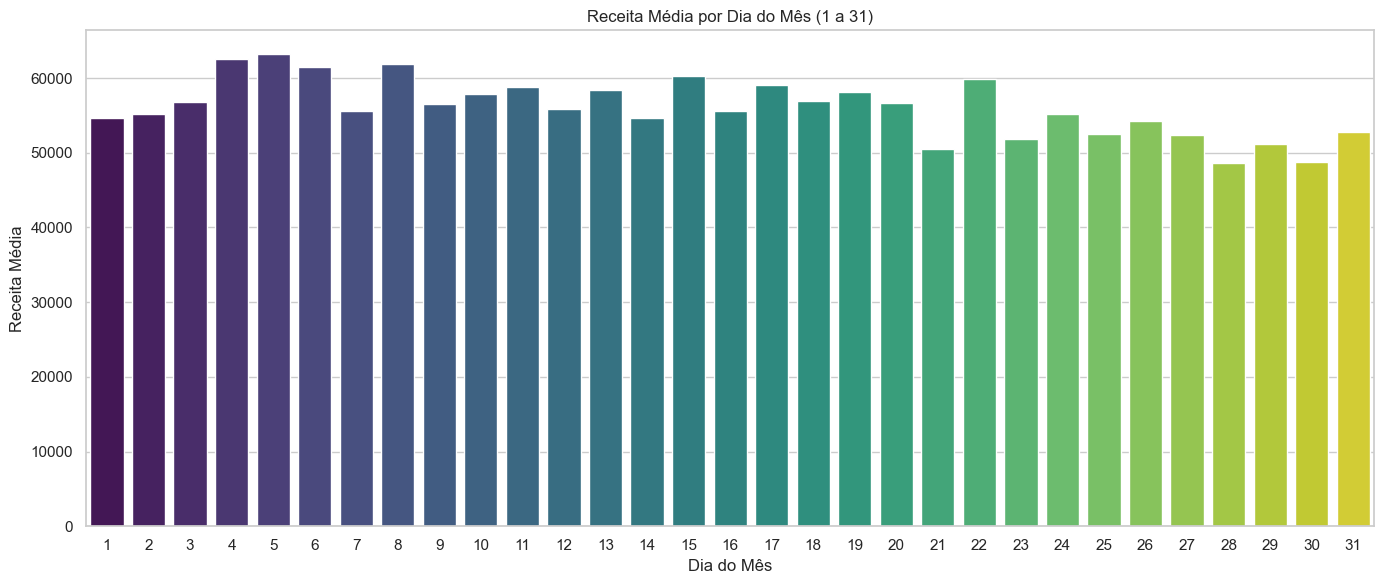

In [12]:
# Garante que a coluna 'data' está em datetime
df_daily['data'] = pd.to_datetime(df_daily['data'])

# Extrai o dia do mês
df_daily['dia_do_mes'] = df_daily['data'].dt.day

# Agrega receita média por dia do mês
df_dia_mes = df_daily.groupby('dia_do_mes')['receita'].mean().reset_index()

#Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=df_dia_mes, x='dia_do_mes', y='receita', palette='viridis')

plt.title('Receita Média por Dia do Mês (1 a 31)')
plt.xlabel('Dia do Mês')
plt.ylabel('Receita Média')
plt.xticks(range(0, 31), [str(i+1) for i in range(31)])
plt.tight_layout()
plt.show()


## 4. Desafio 1.2.2: Sazonalidade por Dias da Semana
Há diferença de receita entre dias úteis e finais de semana?

C:\Users\sophia\AppData\Local\Temp\ipykernel_10912\1112912642.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_weekday, x='dia_semana_nome', y='receita', palette='crest')


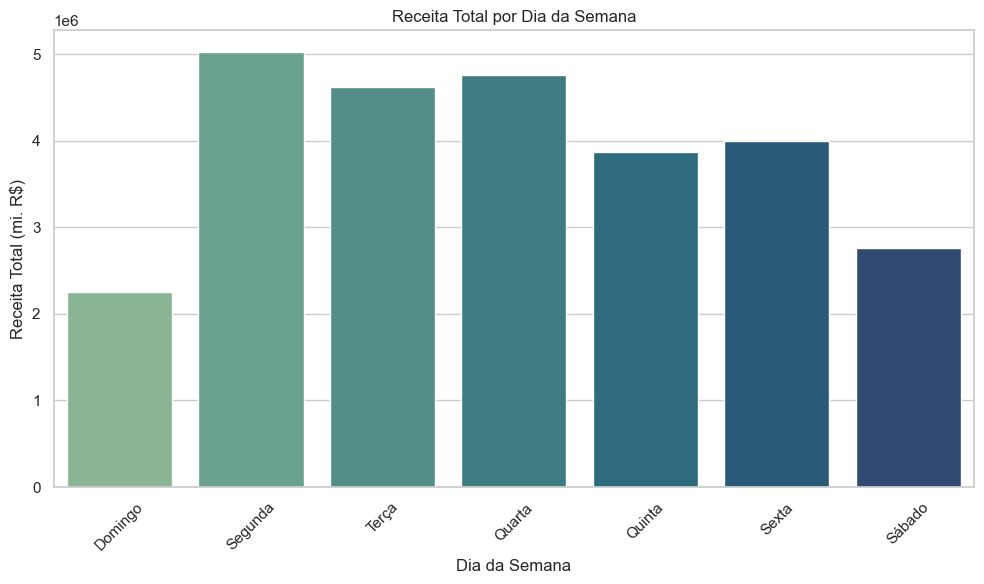

In [13]:
# Executa SQL de vendas por dia da semana
df_weekday = exec_sql('03_sales_by_weekday.sql', env)

# Ordena corretamente os dias da semana em português
dias_ordenados = ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado']
df_weekday['dia_semana_nome'] = pd.Categorical(df_weekday['dia_semana_nome'], categories=dias_ordenados, ordered=True)
df_weekday = df_weekday.sort_values('dia_semana_nome')

# Plotagem
plt.figure(figsize=(10,6))
sns.barplot(data=df_weekday, x='dia_semana_nome', y='receita', palette='crest')
plt.title('Receita Total por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Receita Total (mi. R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Posteriormente uma outra análise que é possível fazer é de Dias Normais x Feriado

## 4. Desafio 1.3: Usuários Pagantes e ARPU

Quantos usuários pagam e quanto em média gastam?

In [14]:
# Executa arquivo sql/04_spend_per_user.sql
df_arpu = exec_sql('04_spend_per_user.sql', env)
df_arpu

,total_users,paying_users,pct_paying,arpu
0,814353,40589,4.98,672.27


## 5. Desafio 1.4: Faturamento Mensal

Qual a performance de receita mês a mês?

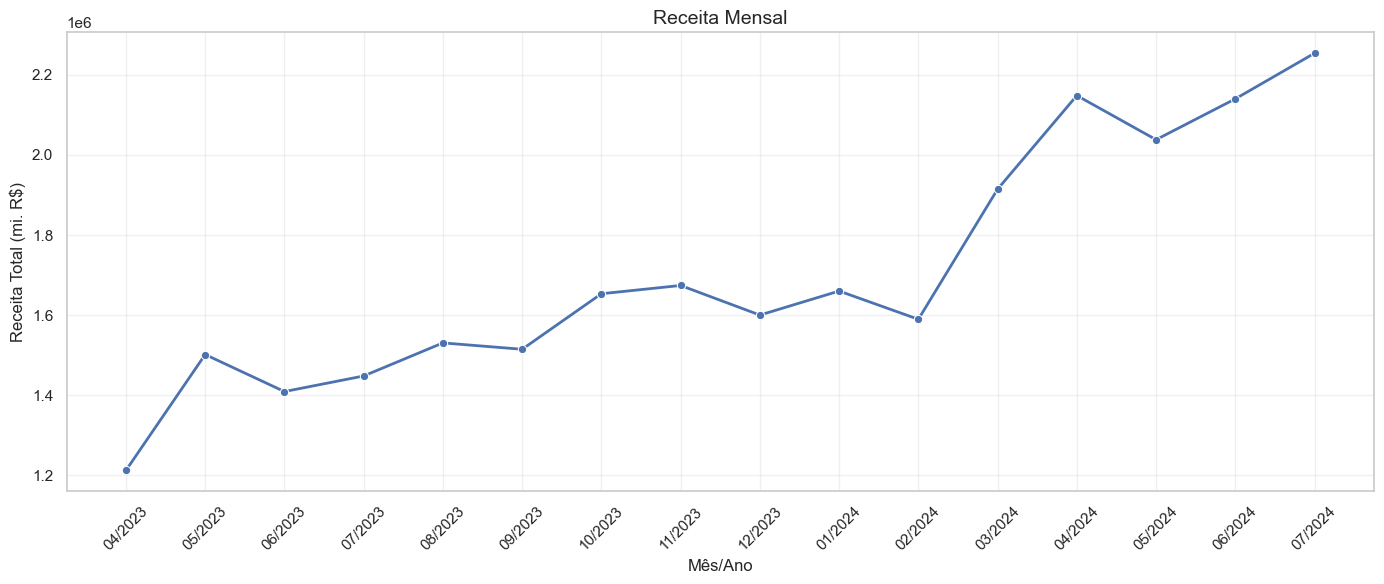

In [15]:
# Executa arquivo sql/05_monthly_revenue.sql
df_monthly = exec_sql('05_monthly_revenue.sql', env)

# Criar gráfico de linha mensal
plt.figure(figsize=(14,6))
sns.lineplot(data=df_monthly, x='mes_ano', y='receita', marker='o', linewidth=2)
plt.xticks(rotation=45)
plt.title('Receita Mensal', fontsize=14)
plt.xlabel('Mês/Ano', fontsize=12)
plt.ylabel('Receita Total (mi. R$)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 6. Desafio 2.1: Identificação da Promoção

Quando ocorreu a promoção de 85% de desconto?

In [16]:
# Executa arquivo sql/06_promotion_period.sql
df_promo = exec_sql('06_promotion_period.sql', env)
df_promo

,data_transacao,total_primeiras_compras,compras_com_desconto,taxa_promocional_pct,dia_consecutivo
0,2024-05-07,90,79,87.78,0
1,2024-05-08,102,92,90.20,1
2,2024-05-09,74,64,86.49,1
3,2024-05-10,79,71,89.87,1
4,2024-05-11,39,35,89.74,1
5,2024-05-13,67,61,91.04,0
6,2024-05-14,76,67,88.16,1
7,2024-05-15,85,76,89.41,1
8,2024-05-16,60,55,91.67,1
9,2024-05-19,32,30,93.75,0


In [17]:
df_promo['data_transacao']=pd.to_datetime(df_promo['data_transacao'])

# Define o início e fim do período promocional
inicio_promocao = df_promo['data_transacao'].min()
fim_promocao = df_promo['data_transacao'].max()

print(f"Início da promoção: {inicio_promocao.date()}")
print(f"Fim da promoção: {fim_promocao.date()}")

Início da promoção: 2024-05-07
Fim da promoção: 2024-06-14


## 7. Desafio 2.2: Impacto da Promoção

Como a receita e o número de transações mudaram?

In [18]:
# Executa arquivo sql/07_promotion_impact.sql
df_impact = exec_sql('07_promotion_impact.sql', env)
df_impact

,periodo,total_usuarios,usuarios_pagantes,receita_total,receita_media_por_pagante
0,antes,17611,17221,584883.69731,33.96
1,durante,2628,2628,56945.55740,21.67
2,depois,2558,2558,88657.74281,34.66


## 8. Desafio 2.3: Impacto da Promoção, parte 2

🧮 **Valeu a pena?**

A promoção reduziu fortemente a **receita média por comprador** (de **R$ 33,96** para **R$ 21,67**) e a **receita total durante o período** foi proporcionalmente **baixa**, mesmo considerando que o período de promoção foi provavelmente **menor que o “antes”**.  
➡️ Em outras palavras, **cada real de desconto gerado não foi compensado pelo volume extra de primeiras compras**.

---

🧪 **Próximas análises recomendadas**

- 📊 **Normalizar por duração**  
  → Comparar **receita / dia** em cada janela para ter certeza de proporções justas.

- 👥 **Taxa de aquisição de novos usuários**  
  → Quantos **novos cadastros** (não apenas compras) vieram em “durante” versus “antes”?

- 🔄 **Taxa de conversão e retenção**  
  → Esses **primeiros compradores promocionais voltaram a comprar**?

- 📈 **Elasticidade de preço**  
  → Modelar a relação entre **nível de desconto** e **receita por usuário** para encontrar o _sweet spot_ —  
    Pode ser que **85% seja muito profundo**, mas **30–50%** gere volume sem canibalizar tanto margem.

- 🧩 **Segmentação**  
  → Ver se o efeito **difere por plano, UF ou método de pagamento**.

---

📌 **Conclusão:**  
A promoção de **85%** **não foi financeiramente vantajosa** no formato em que foi aplicada.  
Sugere-se a realização de **testes mais granulares de desconto** (ex.: 30%, 50%, 70%) e análise de **LTV dos usuários captados**.


## 8. Desafio 2.4: Simulação Monte Carlo de Desconto Ideal

Executamos a simulação para recomendar desconto ideal.

Taxa de Conversão Baseline: 3.92%
Taxa de Conversão na Promoção de 85.0%: 11.29%



c:\Sophie\Coding\Atuais\data-analyst-test-01-martech\scripts\promo_simulation.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(



=========================== RESULTADOS DA SIMULAÇÃO ============================
📈 Melhor desconto para maximizar a receita: 20%
💰 Receita mediana estimada com este desconto: R$298,659.30
💸 Receita mediana do cenário baseline (sem promoção): R$294,470.84
🚀 Impacto estimado sobre o baseline: +1.42%


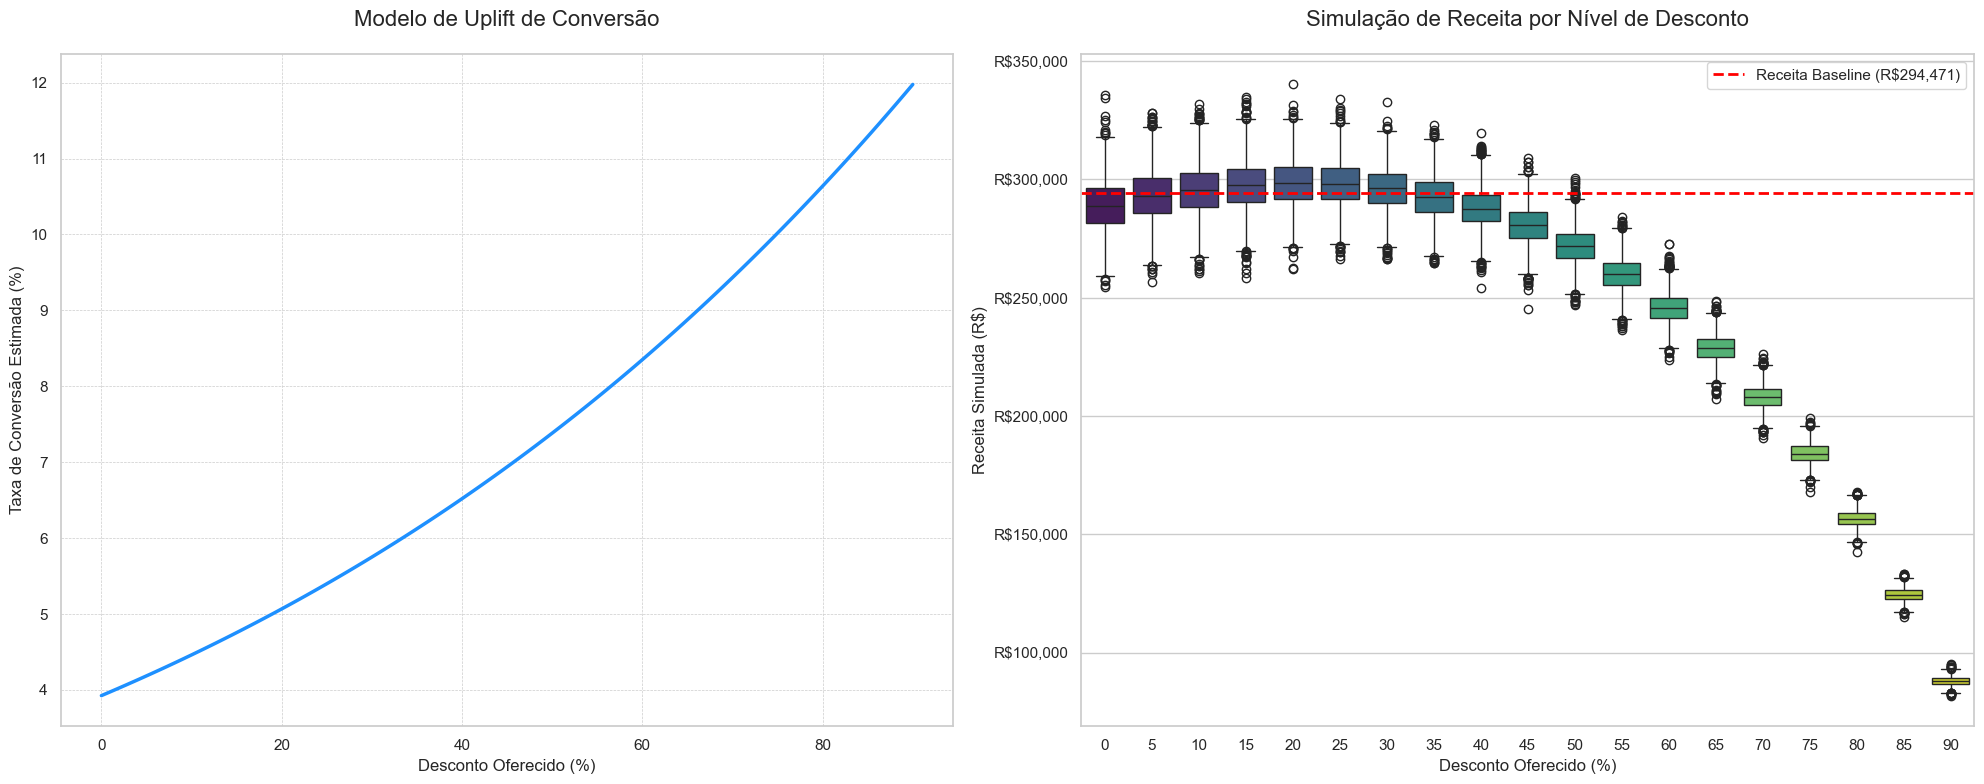

In [19]:
# 8. Executa Simulação Monte Carlo CORRIGIDA para Otimização de Desconto

from scripts.promo_simulation import (
    modelar_uplift_conversao,
    simular_receita_com_uplift,
    analisar_simulacao,
    plotar_resultados_simulacao
)
import pandas as pd
import numpy as np

# --- SETUP: Preparação dos Dados (Esta parte depende da sua análise anterior) ---
# NOTA: Usando dados sintéticos para demonstração. Substitua pelos seus dataframes reais.

# Período da promoção (assumindo que foi identificado na etapa anterior)
periodo_promo_inicio = pd.to_datetime('2024-03-15')
periodo_promo_fim = pd.to_datetime('2024-04-15')
duracao_periodo_dias = (periodo_promo_fim - periodo_promo_inicio).days

# --- Cenário Baseline (Ex: período de 31 dias ANTES da promoção) ---
periodo_base_inicio = periodo_promo_inicio - pd.Timedelta(days=duracao_periodo_dias)
periodo_base_fim = periodo_promo_inicio - pd.Timedelta(days=1)

# Simulação de dados de usuários e transações (SUBSTITUIR PELOS SEUS DADOS)
np.random.seed(42)
total_users = 50000
users_ativos_base = pd.Index(range(20000))
users_ativos_promo = pd.Index(range(20000, 40000))
transacoes_base = pd.DataFrame({
    'user_id': np.random.choice(users_ativos_base, 800), # ~4% de conversão
    'valor_bruto': np.random.lognormal(mean=3.5, sigma=0.4, size=800) * 10
})
transacoes_promo = pd.DataFrame({
    'user_id': np.random.choice(users_ativos_promo, 2400), # ~12% de conversão (uplift de 3x)
    'valor_bruto': np.random.lognormal(mean=3.6, sigma=0.4, size=2400) * 10 # Valor um pouco maior
})

# --- 1. Calcular Parâmetros Essenciais para a Simulação ---

# a) Taxas de conversão (usuários únicos que compraram / usuários ativos no período)
n_usuarios_potenciais = len(users_ativos_base) # Assume populações de mesmo tamanho para comparação
taxa_conversao_base = transacoes_base['user_id'].nunique() / n_usuarios_potenciais
taxa_conversao_promo_observada = transacoes_promo['user_id'].nunique() / len(users_ativos_promo)
desconto_promo_observado = 85.0 # Desconto da promoção original

print(f"Taxa de Conversão Baseline: {taxa_conversao_base:.2%}")
print(f"Taxa de Conversão na Promoção de {desconto_promo_observado}%: {taxa_conversao_promo_observada:.2%}\n")

# b) Distribuição de valor por transação (usamos o valor bruto, antes do desconto)
#    Idealmente, usar uma amostra de transações que não seja da promoção para evitar viés.
dist_valor_transacao = transacoes_base['valor_bruto']

# c) Receita de baseline para comparação
receita_baseline_mediana = transacoes_base['valor_bruto'].sum()


# --- 2. Modelar o Uplift e Executar a Simulação ---

# a) Criar o modelo de uplift de conversão
modelo_uplift = modelar_uplift_conversao(
    taxa_conversao_base=taxa_conversao_base,
    taxa_conversao_promo=taxa_conversao_promo_observada,
    desconto_promo=desconto_promo_observado
)

# b) Definir o range de descontos para simular
descontos_para_simular = list(range(0, 91, 5)) # De 0% a 90% em passos de 5%

# c) Executar a simulação de Monte Carlo
df_simulacao = simular_receita_com_uplift(
    n_usuarios_potenciais=n_usuarios_potenciais,
    dist_valor_transacao=dist_valor_transacao,
    modelo_uplift=modelo_uplift,
    descontos=descontos_para_simular,
    n_sim=3000 # Reduzido para rodar mais rápido, 5000 é um bom número
)


# --- 3. Analisar e Visualizar os Resultados ---
plotar_resultados_simulacao(
    df_sim=df_simulacao,
    modelo_uplift=modelo_uplift,
    descontos_avaliados=descontos_para_simular,
    receita_baseline=receita_baseline_mediana
)

---
## **Otimização de Descontos: Da Simulação à Estratégia de Negócio**
---

Nossa simulação de Monte Carlo identificou, de forma robusta, que um **desconto de 20% é o ponto ideal para maximizar a receita**, projetando um aumento de **+1,42%** sobre a baseline. Essa otimização demonstra um equilíbrio entre o **aumento da taxa de conversão**, que se mostra mais elástica em descontos maiores, e a **erosão natural do preço unitário**. A baixa variância de receita para 20%, aliada à assimetria da curva de receita — que alerta para os riscos de descontos excessivos — **reforça a solidez dessa recomendação**.

---
### **Além da Receita: Uma Visão Estratégica**

Embora o desconto de 20% seja o ponto de otimização da receita, a decisão final de implementação deve ir além dessa métrica. É crucial integrar esta análise com:

* **Lucratividade:** Avaliar as **margens de lucro** e o **impacto no lucro líquido**. Um aumento na receita pode não significar necessariamente um aumento proporcional no lucro.
* **Percepção da Marca:** Considerar como descontos frequentes afetam a **percepção de valor da marca** a longo prazo.
* **Valor do Tempo de Vida do Cliente (CLTV):** Analisar o **impacto estratégico no CLTV**, pois promoções constantes podem condicionar o comportamento de compra e reduzir a fidelidade.
* **Viabilidade Operacional:** Avaliar a **facilidade e os custos de execução** da campanha de desconto.

---
### **Próximos Passos para um Sucesso Duradouro**

A simulação de Monte Carlo oferece uma base analítica poderosa, mas a execução bem-sucedida requer uma abordagem multifacetada:

1.  **Validação Empírica (Testes A/B):** É **fundamental validar** os resultados da simulação através de **testes A/B controlados** para confirmar o impacto real no comportamento do cliente.
2.  **Análise Aprofundada da Lucratividade:** Realizar um estudo detalhado do **impacto no lucro líquido**, incorporando todos os custos e margens.
3.  **Estratégias de Segmentação:** Explorar a **personalização de descontos** para diferentes segmentos de clientes, otimizando o retorno com base em suas elasticidades de preço.
4.  **Monitoramento Contínuo:** Implementar um **sistema de monitoramento robusto** para adaptar proativamente a estratégia de descontos conforme o mercado e o comportamento do consumidor evoluem.

---